<a href="https://colab.research.google.com/github/utkchheda27/ACM-ICPC-Algorithms/blob/master/OneClassSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import json
import random
import re
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [76]:
def extract_port_number(message):
    # Use regular expression to extract the port number
    match = re.search(r"port (\d+)", message, re.IGNORECASE)
    if match:
        return int(match.group(1))
    else:
        return None


def label_windows(json_data, window_size=7, anomaly_prob=0.1):
    windows = []
    labels = []
    num_objects = len(json_data)
    for i in range(num_objects - window_size + 1):
        window = json_data[i:i+window_size]
        if random.random() < anomaly_prob:
            label = 'anomalous'
        else:
            label = 'normal'
        temp=[]
        for log in window:
            temp.append(log['Message'])
        events = [log["Message"].split()[-1] for log in window]

        # Extract port numbers
        ports = [extract_port_number(log["Message"]) for log in window]
        port_dict = {}
        for x in ports:
            if x not in port_dict and x is not None:
                port_dict[x]=0


        target_events = {
            "Change",
            "up",
            "Learning",
            "Forward",
            "Blocking",
            "down",
        }

        for port,event in zip(ports,events):
            if event in target_events:
                port_dict[port] += 1

        tag = 0
        for x in port_dict.keys():
            if port_dict[x]>=4:
                tag=1

        labels.append(tag)
        windows.append(temp)
    return windows, labels

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

In [77]:
json_data =read_json_file("/content/parsed_logs.json")
windows, labels = label_windows(json_data)

In [78]:
print(len(windows))
#out of 1081 logs, window size=7, total 1075 windows

#each window has labels associated to it
print(len(labels))

print(windows[220])

print(labels[220])

1075
1075
['B: Major network physical port status change, port 3 Port Forward', 'B: Major network physical port status change, port 3 Port Blocking', 'B: Major network physical port status change, port 3 Link down', 'B: Major Network Topology Change Detected', 'B: Major network physical port status change, port 3 Link up', 'B: Major network physical port status change, port 3 Port Learning', 'B: Major network physical port status change, port 3 Port Forward']
1


In [80]:
# Load your preprocessed data (X is a list of windows, y are labels)
X = windows  # windows (length 1075)
y = labels  # labels (shape: (1075,))

X_normal = []
y_normal = []

for i in range(len(X)):
    if y[i] == 0:
        X_normal.append(X[i])
        y_normal.append(y[i])

print(len(X_normal))
print(y_normal)

647
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
# Load your preprocessed data (X is a list of windows, y are labels)
X = windows  # windows (length 1075)
y = labels  # labels (shape: (1075,))

# Convert tokenized windows to numpy array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train))
print(len(y_train))

752
752


In [ ]:
# Function to tokenize and vectorize text data
def vectorize_text_data(windows):
    vectorizer = CountVectorizer()  # Using a simple CountVectorizer for tokenization
    X = vectorizer.fit_transform([' '.join(window) for window in windows]).toarray()
    return X, vectorizer

# Function to train One-Class SVM
def train_one_class_svm(X, nu_value=0.01):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train One-Class SVM
    clf = OneClassSVM(kernel='rbf', nu=nu_value)  # Adjust parameters as needed
    clf.fit(X_scaled)

    return clf, scaler

In [ ]:
# Vectorize the training data
X_normal, vectorizer = vectorize_text_data(X_normal)

# Train One-Class SVM with adjusted parameters
clf, scaler = train_one_class_svm(X_normal, nu_value=0.05)  # Adjust nu_value as needed

# Example of predicting on new data
def predict_anomalies(new_window):
    # Vectorize the new window
    new_window_vectorized = vectorizer.transform([' '.join(new_window)]).toarray()

    # Scale the vector
    new_window_scaled = scaler.transform(new_window_vectorized)

    # Predict on the new window
    prediction = clf.predict(new_window_scaled)

    return prediction

In [72]:
predictions = []

for window in X_test:
    prediction = predict_anomalies(window)
    predictions.append(prediction)

print(predictions)

for i, prediction in enumerate(predictions):
    print(f"Window {i + 1}: {'Normal' if prediction == 1 else 'Anomaly'}")


[array([1]), array([-1]), array([-1]), array([1]), array([-1]), array([1]), array([1]), array([-1]), array([-1]), array([1]), array([1]), array([-1]), array([-1]), array([1]), array([1]), array([-1]), array([-1]), array([1]), array([-1]), array([1]), array([1]), array([1]), array([-1]), array([1]), array([1]), array([1]), array([-1]), array([1]), array([1]), array([-1]), array([-1]), array([-1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([-1]), array([-1]), array([1]), array([1]), array([1]), array([1]), array([-1]), array([1]), array([1]), array([-1]), array([-1]), array([1]), array([-1]), array([1]), array([-1]), array([1]), array([-1]), array([1]), array([1]), array([-1]), array([1]), array([-1]), array([-1]), array([-1]), array([1]), array([1]), array([-1]), array([-1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([-1]), array([-1]), array([1]), array([-1]), array([1]), array([-1]), array([-1]), array([1]), array([-1]), arra

In [84]:
#SVM predicts anomalous as -1 and normal as 1
#y_test has normal as 0 and anomalous as 1

In [90]:
# Flatten the list of predictions
flat_predictions = [0 if pred == 1 else 1 for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(y_test, flat_predictions)

print("Accuracy:", accuracy)

Accuracy: 0.9287925696594427


In [91]:
print(y_test)
print(flat_predictions)

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 0, 1, 1, 0,

In [92]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, flat_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[170  14]
 [  9 130]]


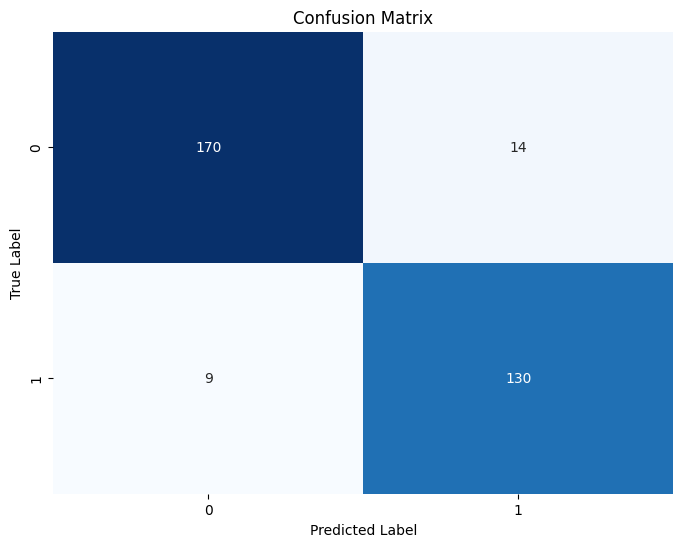

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, flat_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
from sklearn.metrics import f1_score

# Compute the F1 score
f1 = f1_score(y_test, flat_predictions)

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 0.9187279151943463


In [89]:
print(flat_predictions[:])

[0, -1, -1, 0, -1, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1, -1, 0, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, 0, 0, -1, -1, 0, -1, 0, -1, 0, -1, 0, 0, -1, 0, -1, -1, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, -1, 0, -1, 0, -1, -1, 0, -1, -1, 0, 0, -1, 0, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, 0, -1, -1, -1, -1, -1, 0, -1, -1, -1, 0, 0, -1, 0, -1, 0, 0, -1, -1, 0, -1, 0, -1, -1, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, 0, -1, 0, -1, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, -1, 0, -1, -1, -1, 0, -1, -1, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, -1, 0, -1, 0, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1, 0, -1, 0, 0, 0, -1, 0, -1, -1, -1, -1, 0, -1, 0, 0, -1, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0